In [2]:
import pandas as pd

In [2]:
df=pd.read_csv('combined_data.csv')

In [6]:
df['friends_count'] = df['friends_count'].replace(0, 1)

# Calculate followers-to-friends ratio.
df['followers_friends_ratio'] = df['followers_count'] / df['friends_count']

print(df[['name', 'followers_friends_ratio']])

                  name  followers_friends_ratio
0         Livio Barone                 0.353383
1    A s s o n a n z e                 4.833333
2      Francesca Disti                 0.000000
3          Il tennista                 0.638548
4          Mehak Sapra                 0.459082
..                 ...                      ...
995    Kaithlene Alfar                 0.866324
996    KumKum Dasgupta                 1.465649
997        Mario Bello                 0.698057
998             Cocomo                 2.963250
999        Your Master                 1.088832

[1000 rows x 2 columns]


In [10]:
import pandas as pd
from scipy import stats
import numpy as np

df['log_followers_to_friends_ratio'] = np.log1p(df['followers_friends_ratio'])
# First, separate the ratios into two groups: bots and not bots
bot_ratios = df[df['Type'] == 'Bot']['followers_friends_ratio']
not_bot_ratios = df[df['Type'] != 'Bot']['followers_friends_ratio']


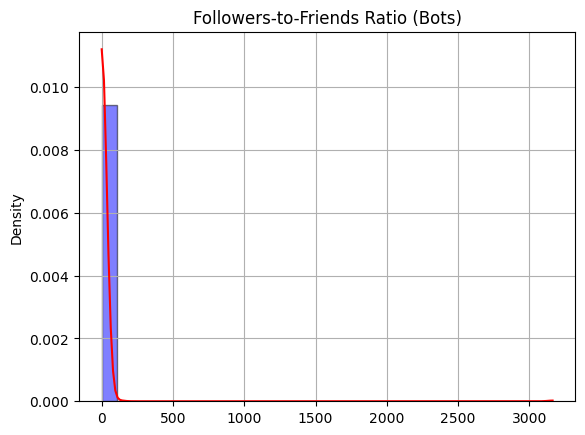

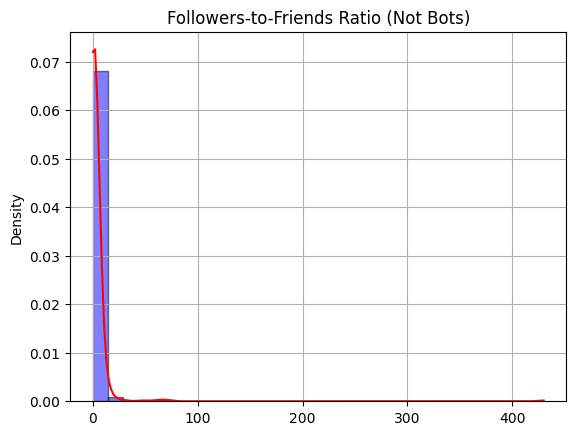

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_hist_kde(data, title):
    # Calculate the KDE
    density = gaussian_kde(data)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    
    # Plot histogram
    plt.hist(data, bins=30, alpha=0.5, density=True, color='blue', edgecolor='black')
    
    # Plot KDE
    xs = np.linspace(min(data), max(data), 200)
    plt.plot(xs, density(xs), color='red')
    
    plt.title(title)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

# Plot for bots
plot_hist_kde(bot_ratios, 'Followers-to-Friends Ratio (Bots)')

# Plot for not bots
plot_hist_kde(not_bot_ratios, 'Followers-to-Friends Ratio (Not Bots)')


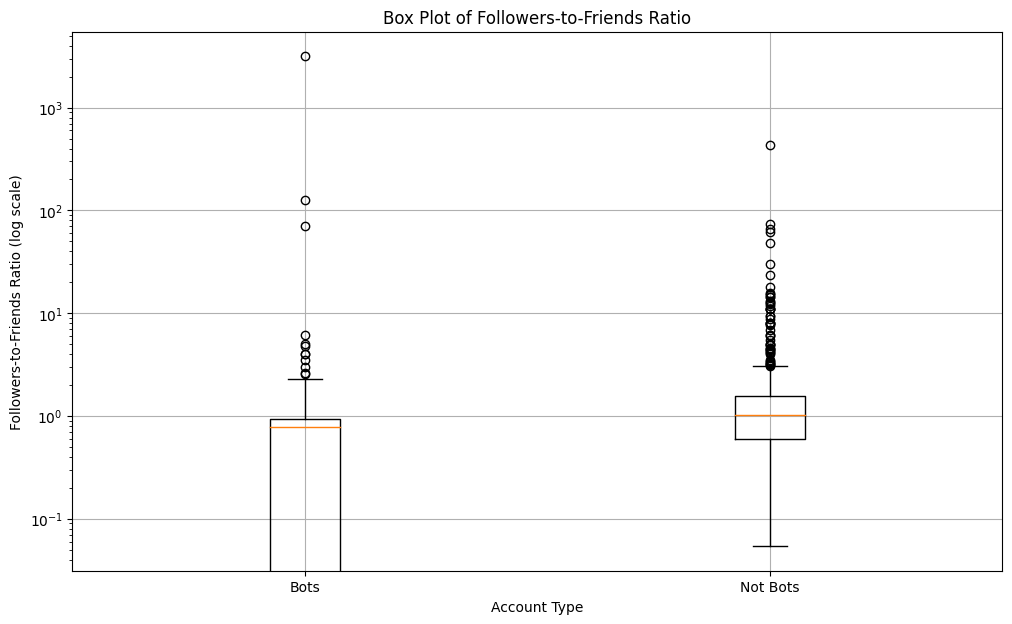

In [15]:
import matplotlib.pyplot as plt

# Create a new DataFrame for plotting
df['log_followers_to_friends_ratio'] = np.log1p(df['followers_friends_ratio'])
plot_data = [bot_ratios, not_bot_ratios]

# Box plot
plt.figure(figsize=(12, 7))
plt.boxplot(plot_data, labels=['Bots', 'Not Bots'])
plt.yscale('log') # Log scale might be necessary if there are extreme outliers
plt.xlabel('Account Type')
plt.ylabel('Followers-to-Friends Ratio (log scale)')
plt.title('Box Plot of Followers-to-Friends Ratio')
plt.grid(True)
plt.show()



In [11]:
# Define a function to detect outliers based on IQR
def detect_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    outlier_cutoff = iqr * 1.5
    lower_limit = q1 - outlier_cutoff
    upper_limit = q3 + outlier_cutoff
    return data[(data < lower_limit) | (data > upper_limit)]

# Identify outliers in each group
bot_outliers = detect_outliers(df[df['Type'] == 'Bot']['followers_friends_ratio'])
not_bot_outliers = detect_outliers(df[df['Type'] != 'Bot']['followers_friends_ratio'])

# Extract rows corresponding to outliers for further analysis
bot_outliers_data = df[df['followers_friends_ratio'].isin(bot_outliers)]
not_bot_outliers_data = df[df['followers_friends_ratio'].isin(not_bot_outliers)]


In [12]:
bot_outliers_data

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,...,description,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,Type,followers_friends_ratio,log_followers_to_friends_ratio
1,1970829738,A s s o n a n z e,AssonanzePage,4861,58,12,0,0,it,NaN,...,Twitter ufficiale della pagina A s s o n a n z e.,Sat Oct 19 08:27:44 +0000 2013,2013-10-19 10:27:44,2014-05-20 23:22:56,2016-03-15 14:18:39,1,NaN,Bot,4.833333,1.763589
32,282659109,Sconton,Sconton,22794,192,73,0,1,it,NaN,...,Sconton è un portale fondato sui gruppi d'acqu...,Fri Apr 15 16:57:53 +0000 2011,2011-04-15 18:57:53,2014-05-24 23:20:59,2016-03-15 14:18:27,1,NaN,Bot,2.630137,1.289270
171,2425786212,Madhu,KadduKittu,7918,245,49,1410,3,en,Chennai,...,"KADDU DEEWANI n DAY (KADDU) DREAMER , LOVE KAR...",Thu Apr 03 15:30:54 +0000 2014,2014-04-03 17:30:54,2015-05-01 16:47:03,2016-03-15 15:57:44,0,0.0,Genuine,5.000000,1.791759
183,1268986922,Maddie Malice,MaliceCakes,10187,456,75,9015,0,en,NaN,...,I am the devil and I do the devils work.,Fri Mar 15 06:36:51 +0000 2013,2013-03-15 07:36:51,2014-05-05 23:22:26,2016-03-15 14:16:28,1,NaN,Bot,6.080000,1.957274
604,467140568,Grazia,Graciauee,289,126,1,0,0,en,NaN,...,La cosa più triste è vedere una persona sola l...,Wed Jan 18 04:51:22 +0000 2012,2012-01-18 05:51:22,2014-06-09 23:23:24,2016-03-15 14:15:02,1,NaN,Bot,126.000000,4.844187
651,336996257,Rosanna Marani,RosannaMarani,106283,3307,934,34156,88,it,Greenland,...,Per sapere chi sono statahttp://t.co/YnHLAz1Hy...,Sun Jul 17 08:10:34 +0000 2011,2011-07-17 10:10:34,2014-05-23 23:22:23,2016-03-15 14:17:37,1,NaN,Bot,3.540685,1.513078
740,2272038535,LauraManasse,lauramanasse,550,540,213,0,0,it,Athens,...,tennis,Wed Jan 01 19:53:25 +0000 2014,2014-01-01 20:53:25,2014-06-09 23:24:04,2016-03-15 14:11:59,1,NaN,Bot,2.535211,1.262773
767,466477122,Oreste,OresteSenno,129,3,1,0,0,it,Athens,...,"Non è l'amore ad esser cieco, ma la gelosia",Tue Jan 17 13:05:45 +0000 2012,2012-01-17 14:05:45,2014-06-09 23:24:09,2016-03-15 14:18:04,1,NaN,Bot,3.000000,1.386294
838,2266513298,#Citazioni BOT,JQuotesBOT,9794,350,5,43,4,it,NaN,...,Ritwitto aforismi e citazioni. Gradisco #FF e ...,Sat Dec 28 22:24:01 +0000 2013,2013-12-28 23:24:01,2014-05-30 23:24:13,2016-03-15 14:13:47,1,NaN,Bot,70.000000,4.262680
910,466360562,Elisabetta Faino,ElisabettaFaino,129,5,1,0,0,it,Athens,...,Essere audaci ed essere incoscienti sono due c...,Tue Jan 17 09:52:24 +0000 2012,2012-01-17 10:52:24,2014-06-09 23:24:15,2016-03-15 14:17:58,1,NaN,Bot,5.000000,1.791759


In [3]:
import pandas as pd

# Calculate the percentage of null values for each column
null_percentage = df.isnull().mean() * 100

# Decide on a threshold
threshold = 50  # For example, if you want to drop columns with more than 50% null values

# Find columns to drop
columns_to_drop = null_percentage[null_percentage > threshold].index

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Display the dropped columns
print(f"Dropped columns with more than {threshold}% null values: {list(columns_to_drop)}")


Dropped columns with more than 50% null values: ['url', 'default_profile', 'default_profile_image', 'geo_enabled', 'profile_banner_url', 'profile_background_tile', 'is_translator', 'follow_request_sent', 'protected', 'verified', 'notifications', 'contributors_enabled', 'following']


In [4]:
df

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,...,profile_link_color,utc_offset,description,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,Type
0,467124570,Livio Barone,LivioBarone34,85,47,133,0,0,it,Athens,...,FF0000,10800.0,La vita è troppo breve per preoccuparsi di cos...,Wed Jan 18 04:22:26 +0000 2012,2012-01-18 05:22:26,2014-06-06 23:22:44,2016-03-15 14:19:31,1,NaN,Bot
1,1970829738,A s s o n a n z e,AssonanzePage,4861,58,12,0,0,it,NaN,...,0084B4,NaN,Twitter ufficiale della pagina A s s o n a n z e.,Sat Oct 19 08:27:44 +0000 2013,2013-10-19 10:27:44,2014-05-20 23:22:56,2016-03-15 14:18:39,1,NaN,Bot
2,466226701,Francesca Disti,FrancescaDisti,34,0,0,0,0,it,Athens,...,2FC2EF,10800.0,Renditi conto che si può vincere anche se i tu...,Tue Jan 17 05:40:32 +0000 2012,2012-01-17 06:40:32,2014-06-09 23:22:07,2016-03-15 14:21:36,1,NaN,Bot
3,576148031,Il tennista,Cordiluca,2374,1196,1873,0,3,it,Athens,...,0084B4,10800.0,"Un cuore non si giudica solo da quanto tu ami,...",Thu May 10 11:19:30 +0000 2012,2012-05-10 13:19:30,2014-06-07 23:24:07,2016-03-15 14:13:58,1,NaN,Bot
4,337287569,Mehak Sapra,mehaksapra3,2648,230,501,86,4,en,New Delhi,...,3E4415,19800.0,"Businesswoman, Founder of Highness Jewels,PR P...",Sun Jul 17 19:44:50 +0000 2011,2011-07-17 21:44:50,2015-05-01 22:36:43,2016-03-15 16:07:45,1,1.0,Genuine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2808620294,Kaithlene Alfar,kaaithlene,12235,337,389,6056,2,en,Urumqi,...,0084B4,28800.0,little earthling | snapchat: skaiithbooardd,Sun Sep 14 03:12:39 +0000 2014,2014-09-14 05:12:39,2015-05-01 21:50:14,2016-03-15 16:06:32,0,0.0,Genuine
996,1124364168,KumKum Dasgupta,kumkumdasgupta,1156,384,262,34,14,en,New Delhi,...,0084B4,19800.0,"Associate Editor, Hindustan Times; Journalist/...",Sun Jan 27 08:20:14 +0000 2013,2013-01-27 09:20:14,2015-05-02 00:20:23,2016-03-15 16:07:00,0,0.0,Genuine
997,467121186,Mario Bello,MarioneBello,134,467,669,0,0,it,Athens,...,2FC2EF,10800.0,"Dovremmo sempre esser pronti al peggio, solo c...",Wed Jan 18 04:16:15 +0000 2012,2012-01-18 05:16:15,2014-06-09 23:20:31,2016-03-15 14:15:16,1,NaN,Bot
998,2220325358,Cocomo,HarmonyRyoBlaze,15840,1532,517,983,9,en,NaN,...,ABB8C2,NaN,| Anime Lover | Linkin Park for Life | Footbal...,Thu Nov 28 20:40:55 +0000 2013,2013-11-28 21:40:55,2015-05-01 14:14:49,2016-03-15 15:56:47,1,1.0,Genuine
